In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('alzheimers_dataset_clean.csv')

In [3]:
df.shape

(2000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2000 non-null   int64  
 1   mmse_score            2000 non-null   float64
 2   cdr_score             2000 non-null   float64
 3   hippocampal_volume    2000 non-null   float64
 4   brain_atrophy         2000 non-null   float64
 5   tau_protein           2000 non-null   float64
 6   abeta_protein         2000 non-null   float64
 7   alzheimers_diagnosed  2000 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 125.1 KB


In [5]:
df.isna().sum()

age                     0
mmse_score              0
cdr_score               0
hippocampal_volume      0
brain_atrophy           0
tau_protein             0
abeta_protein           0
alzheimers_diagnosed    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,age,mmse_score,cdr_score,hippocampal_volume,brain_atrophy,tau_protein,abeta_protein,alzheimers_diagnosed
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,74.60650,14.878174,1.519767,2773.823810,0.457284,613.253064,1000.498422,0.199500
std,8.64147,8.738081,0.867960,712.811275,0.202433,232.597984,459.240793,0.399724
min,60.00000,0.039596,0.000757,1501.529088,0.100699,200.038499,201.746466,0.000000
25%,67.00000,7.122907,0.775425,2169.773443,0.289156,413.750612,603.098403,0.000000
50%,75.00000,14.674344,1.550810,2772.677699,0.456564,627.123171,1001.520307,0.000000
75%,82.00000,22.778737,2.258928,3376.420517,0.632565,813.066834,1382.265227,0.000000
max,89.00000,29.994154,2.999774,3999.678596,0.799931,999.725047,1799.120837,1.000000


In [8]:
df.head()

,age,mmse_score,cdr_score,hippocampal_volume,brain_atrophy,tau_protein,abeta_protein,alzheimers_diagnosed
0,62,28.764029,0.171539,2859.316837,0.489624,425.428397,1337.051803,0
1,66,6.180522,1.790892,2189.088425,0.689936,700.538570,1230.181176,0
2,89,19.644941,1.707140,2053.088370,0.206980,528.925310,1432.018224,0
3,69,1.301901,0.107023,2818.483785,0.122914,387.465434,775.154522,0
4,79,1.992492,1.540566,1924.550865,0.272768,611.397691,487.092435,1


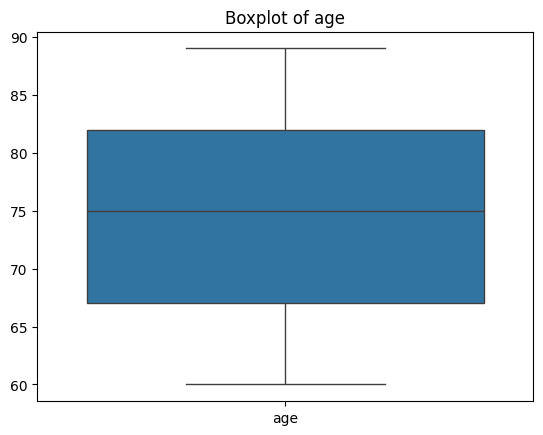

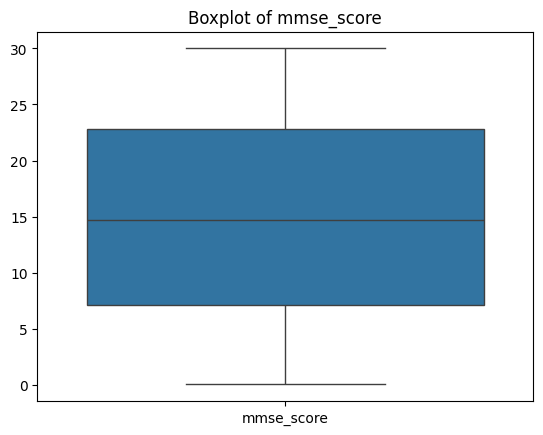

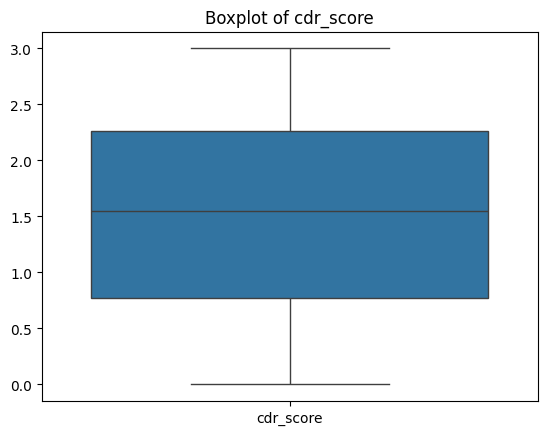

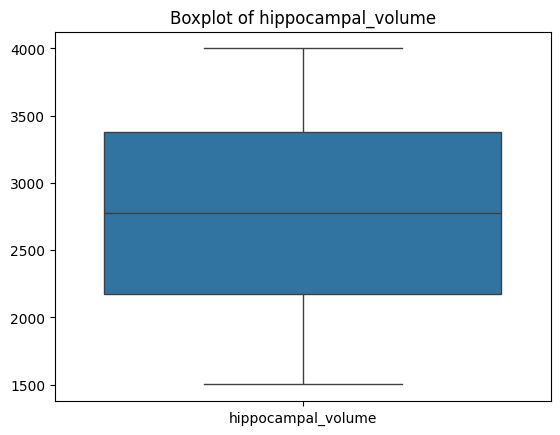

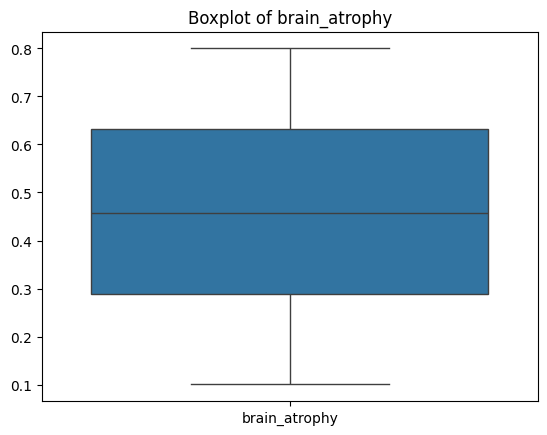

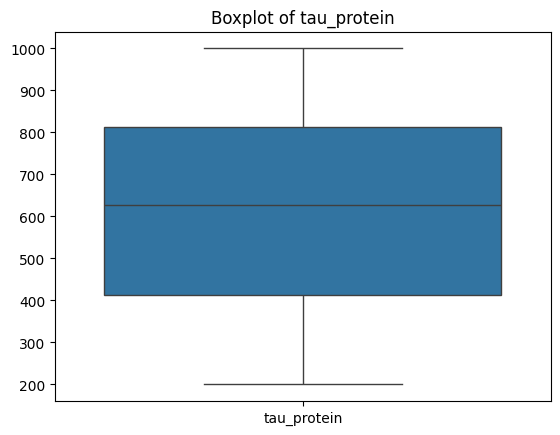

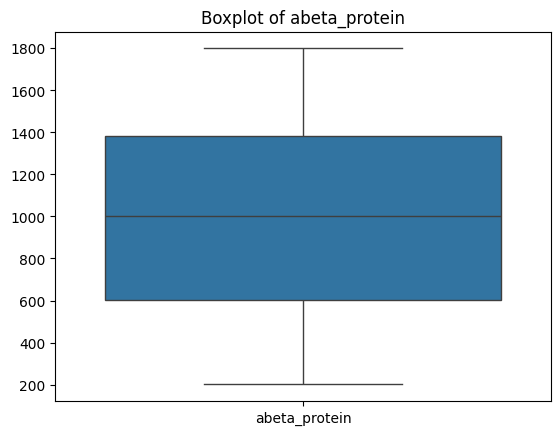

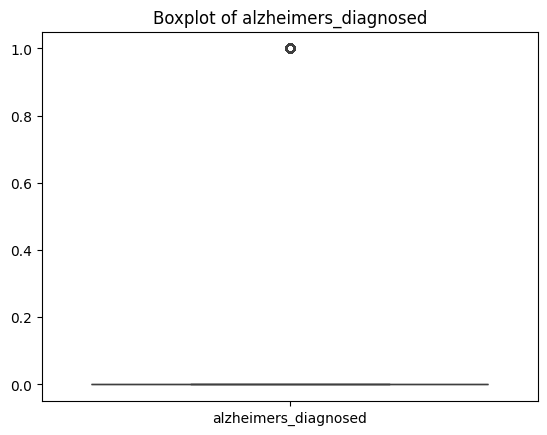

In [9]:
for col in df:
    sns.boxplot([df[col]])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [10]:
df['alzheimers_diagnosed'].value_counts()

alzheimers_diagnosed
0    1601
1     399
Name: count, dtype: int64

Sampling

In [11]:
X=df.drop(columns='alzheimers_diagnosed')
y=df['alzheimers_diagnosed']

In [12]:
pipe=Pipeline([
    ('oversampling', SMOTE(sampling_strategy={1:800})),
    ('undersampling', RandomUnderSampler(sampling_strategy={0:800}))
])

In [13]:
X_sampled, y_sampled=pipe.fit_resample(X,y)

In [14]:
y_sampled.value_counts()

alzheimers_diagnosed
0    800
1    800
Name: count, dtype: int64

Scaling

In [15]:
minmax=MinMaxScaler()
X_scaled=minmax.fit_transform(X_sampled)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled, y_sampled, test_size=0.3, random_state=42)

KNeighborsClassifier()
90
              precision    recall  f1-score   support

           0       0.98      0.84      0.90       251
           1       0.85      0.98      0.91       229

    accuracy                           0.90       480
   macro avg       0.91      0.91      0.90       480
weighted avg       0.91      0.90      0.90       480



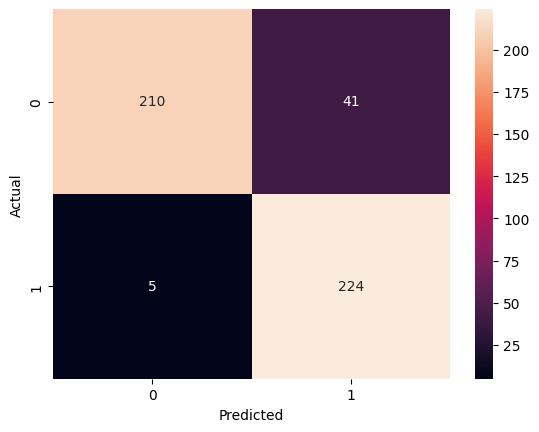

SVC()
97
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       251
           1       0.95      0.99      0.97       229

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



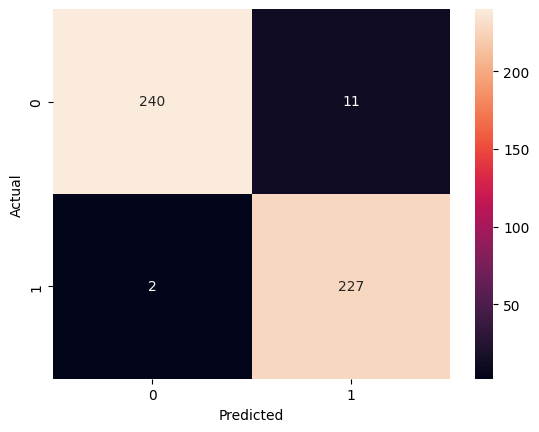

DecisionTreeClassifier()
100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00       229

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



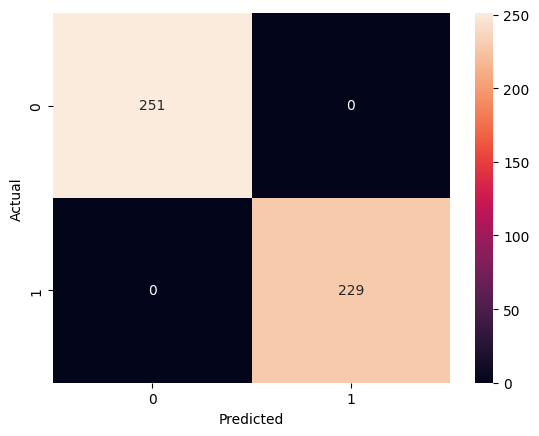

GaussianNB()
96
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       251
           1       0.93      0.98      0.96       229

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



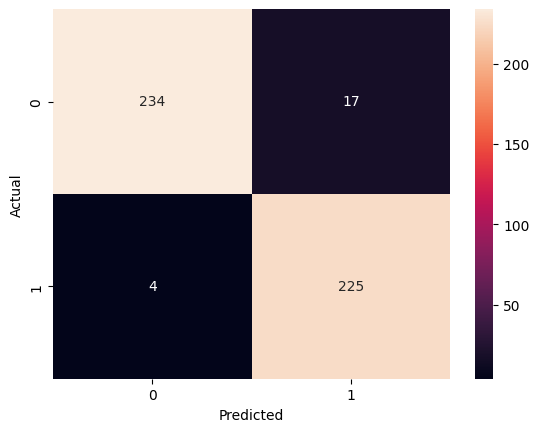

In [17]:
models={KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), GaussianNB()}
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model)
    print(round(accuracy_score(y_test, y_pred)*100))
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    